In [1]:
# imports
import torch
import utils
import my_models
import hyperparameters as h # this prints GPU enabled = True
import numpy as np
import matplotlib.pyplot as plt

files = ['sample-music.txt', 'input.txt']
# load the inputs as a list of ints
inputs, char2int_cypher, int2char_cypher = utils.load_music(files[1], use_custom=True)
# full input.txt is 501470 in length
dict_size = len(char2int_cypher) # conversion is the dict convert char to int

h.char2int_cypher = char2int_cypher
h.int2char_cypher = int2char_cypher


# define test and validation set
split = int(len(inputs) * 0.1) # change 0.1 to how big we want validation set to be
validation_set = inputs[:split]
training_set = inputs[split:]


# create model
lstm = my_models.lstm_char_rnn(dict_size, h.hidden_size, h.num_hidden_layers, batch_size=h.batch_size)
init_hidden = lstm.initialize_hidden()
if h.GPU:
    init_hidden = init_hidden.cuda()
    lstm.cuda()

optimizer_lstm = torch.optim.Adam(lstm.parameters(), lr=0.01)

GPU is enabled 
Using custom starts and ends...
There are 95 unique characters in this dataset



In [2]:

best_state, last_state = my_models.train(lstm, optimizer_lstm, h.epochs, training_set,
                       validation_set, h.sequence_length, init_hidden, force_epochs=False)



Epoch 0/299
----------
Working on sequence 0-10000
finished training with this epoch!
training Loss:	2.6502870456738905

Working on sequence 0-10000
finished validation with this epoch!
validation Loss:	2.1558712588416205


Epoch 1/299
----------
Working on sequence 0-10000
finished training with this epoch!
training Loss:	1.766425377943299

Working on sequence 0-10000
finished validation with this epoch!
validation Loss:	1.8265537685818143


Epoch 2/299
----------
Working on sequence 0-10000
finished training with this epoch!
training Loss:	1.5595953085205772

Working on sequence 0-10000
finished validation with this epoch!
validation Loss:	1.7605561282899644


Epoch 3/299
----------
Working on sequence 0-10000
finished training with this epoch!
training Loss:	1.4677861441265454

Working on sequence 0-10000
finished validation with this epoch!
validation Loss:	1.7137751181920369


Epoch 4/299
----------
Working on sequence 0-10000
finished training with this epoch!
training Loss:	1.4

In [3]:
predicted_chars, hidden_activations = my_models.generate(last_state, lstm, h.temperature, h.prediction_length)

final output =  $. Ronded #197-175
D:Norclec BEr
Z:id:hn-slipjig-7
M:9/8
K:D
cBA cAG|EAG ~A3|GEA GBc|ADF EFD|B,G, EDD|GEF GED|~G2a afg|fed cBG|~G3 AFE|GFG B2E|GFG CGB|GDC D2D|EDE E2A|BAF GBA||
P:erindaint
BGG G=GG|Bdd AGF|EcB cBA|GEE E2 cBA|1 BGE GBd:|2 AGF E2D | E2G ^ECG FGB | A2A dcB ABG | ~A3 E2F |
GAB cAF G2A ||
|:edc efe cBc|dBc BEE ~G3|AAF D2F DB,|DGG GDD B2E|B,CE edB | ABG AGE | FAB dBA G2E |
ADD FEG EBG EEG | DEE DB,D | EED ADD D3|G2D GAB B2A DEG|GBd efc e2d|
ced BGd cAG|E3 G2A|BAF G3d cdg|
e2G dgB BdB|AFD ||
;
$
X:5
T:Codes in Bro\'e
C:Deteem aan dgan StappernBine (17754-1770-170-07712005-177
Z:Transc


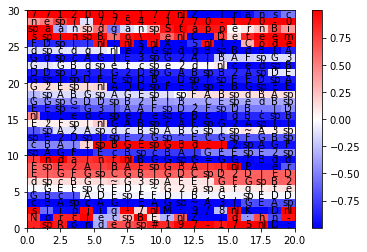

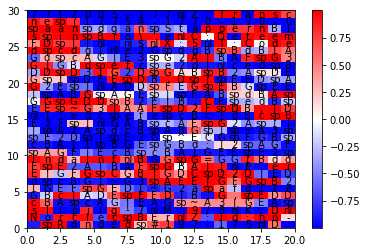

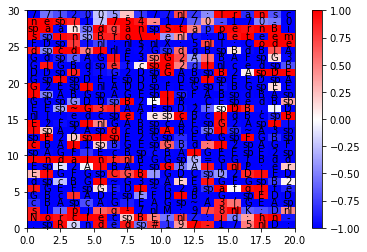

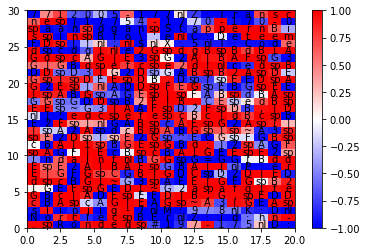

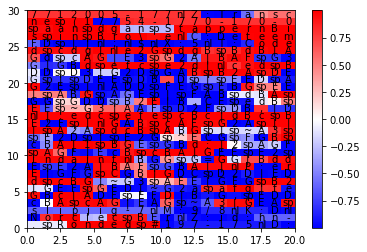

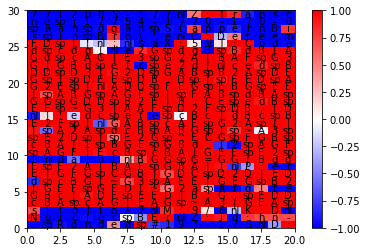

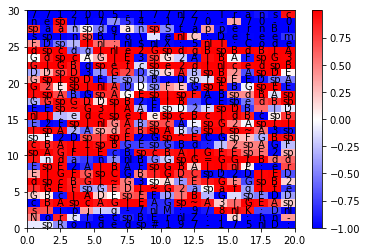

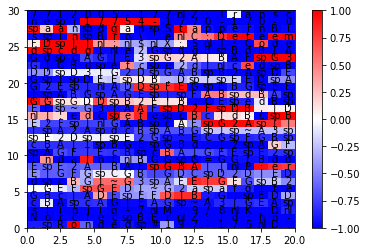

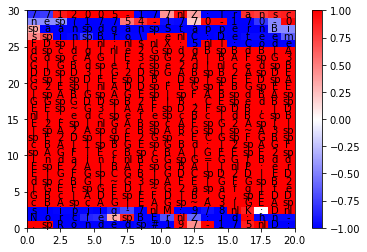

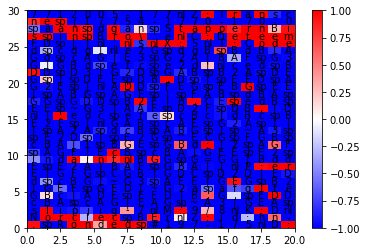

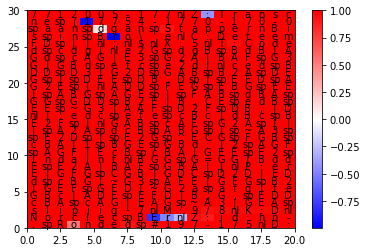

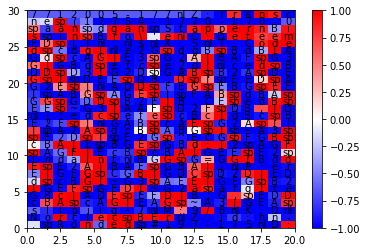

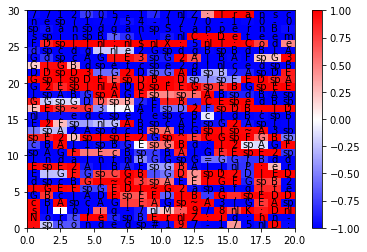

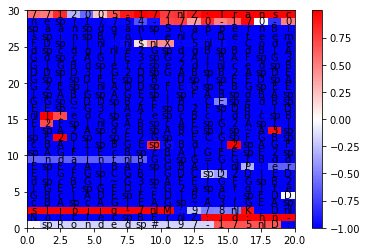

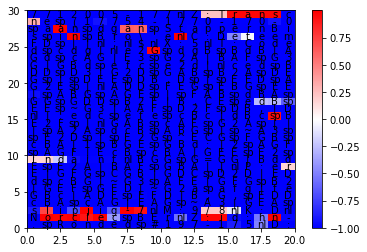

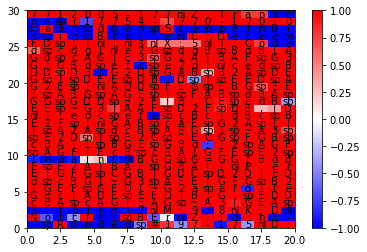

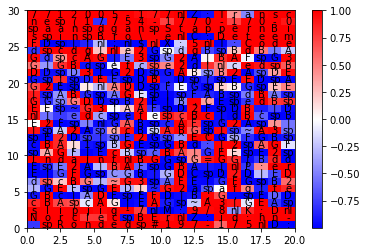

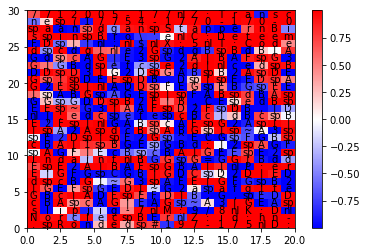

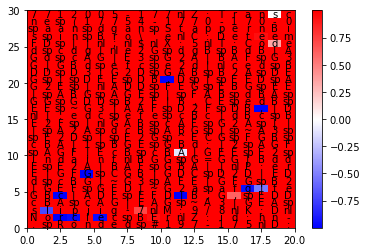

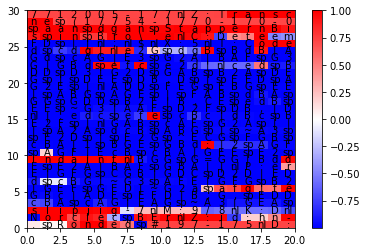

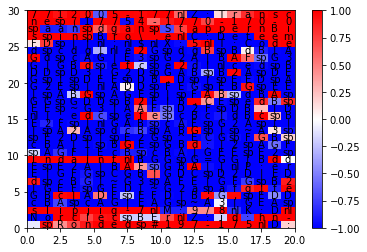

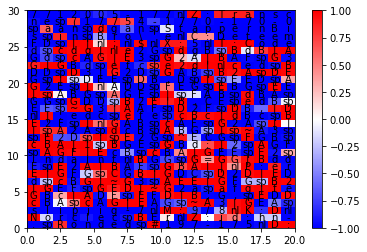

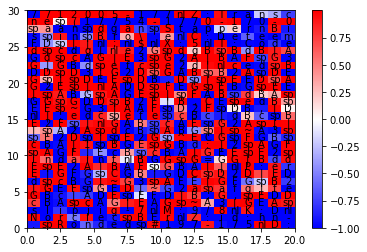

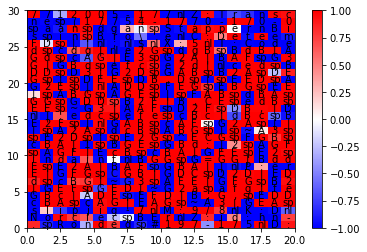

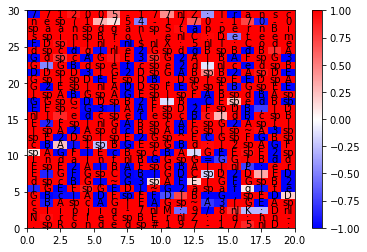

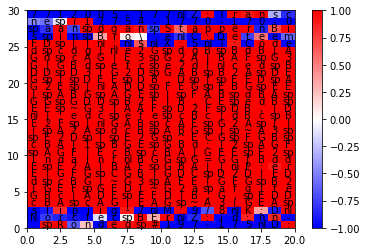

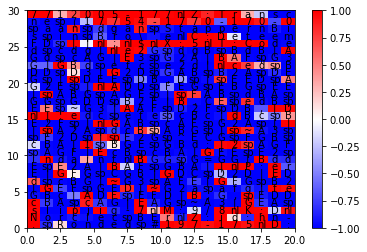

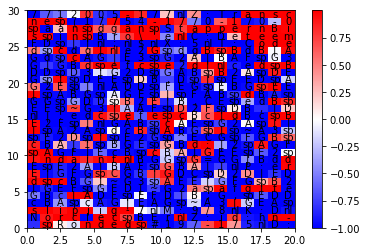

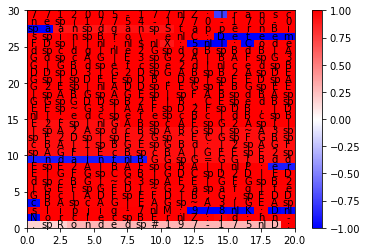

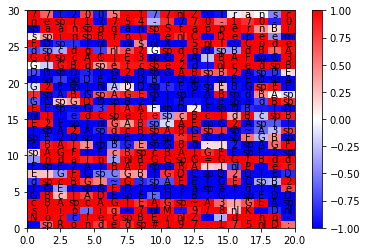

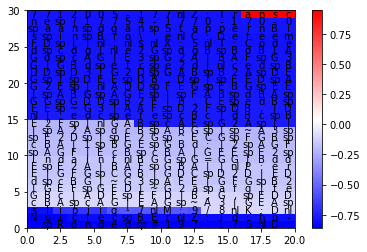

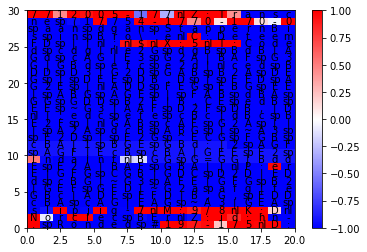

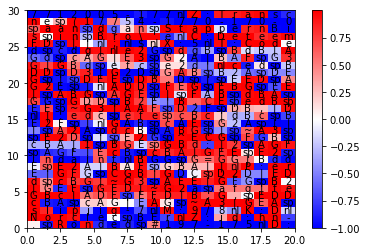

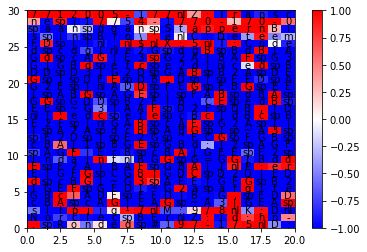

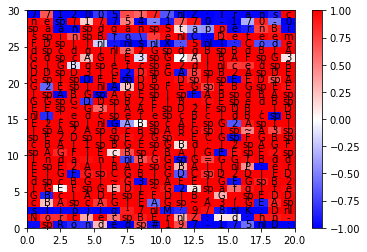

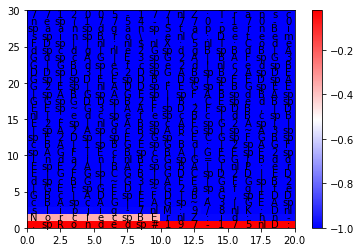

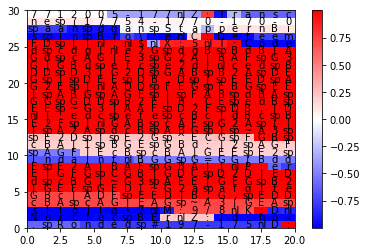

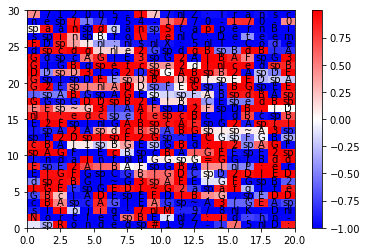

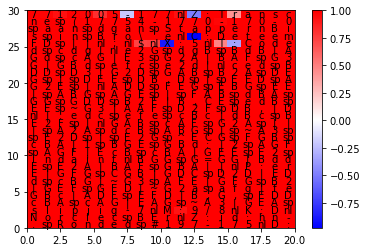

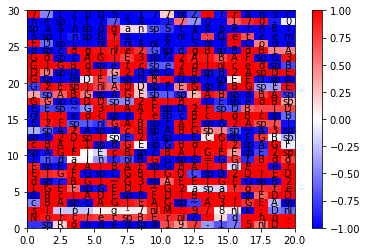

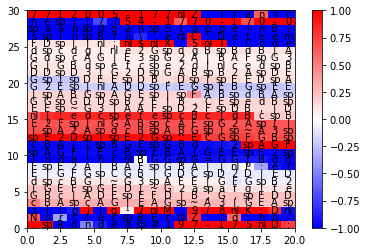

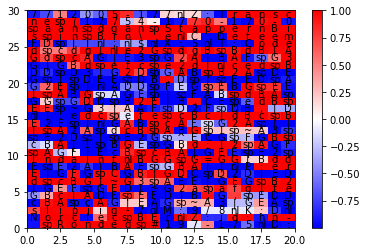

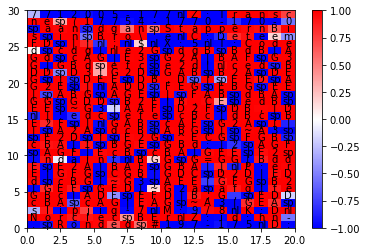

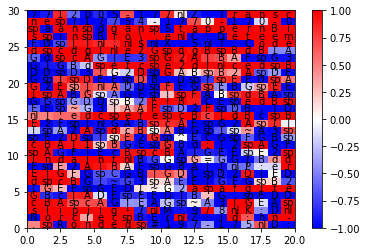

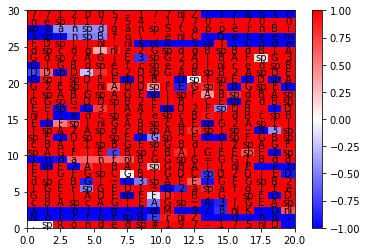

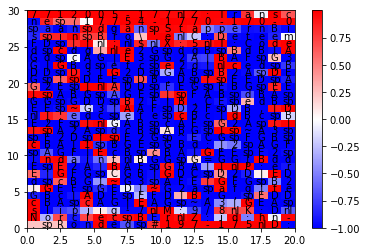

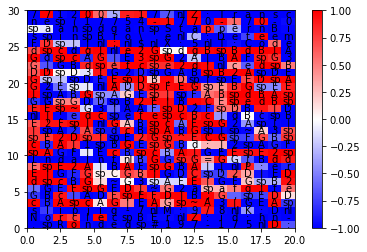

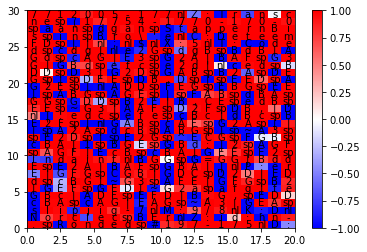

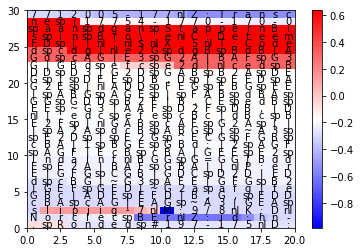

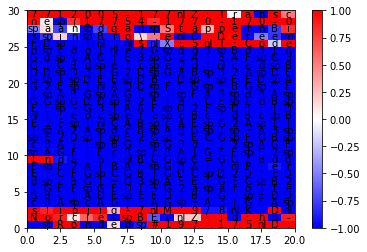

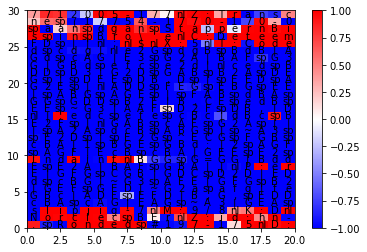

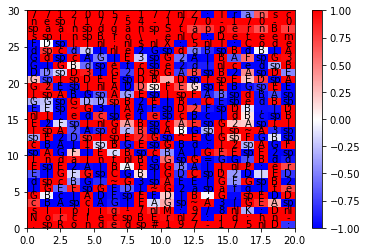

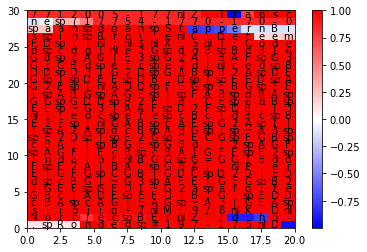

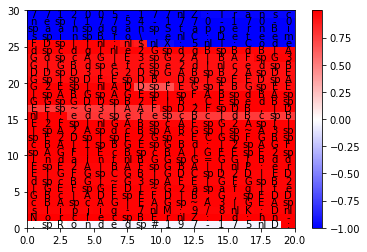

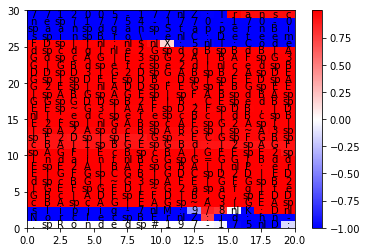

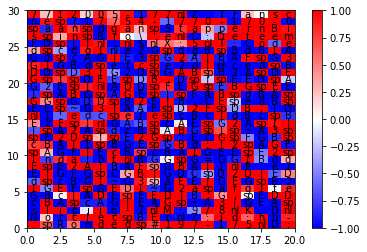

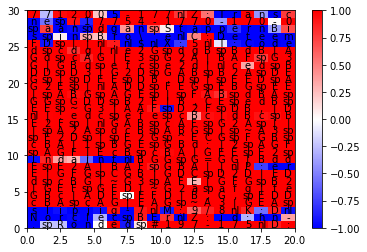

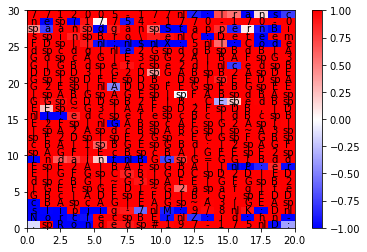

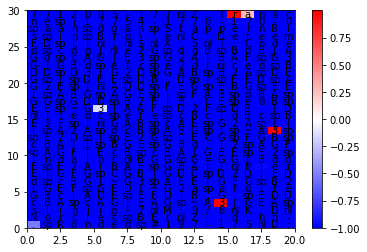

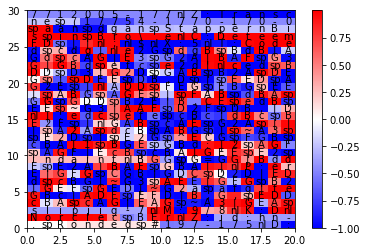

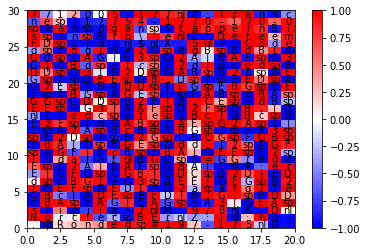

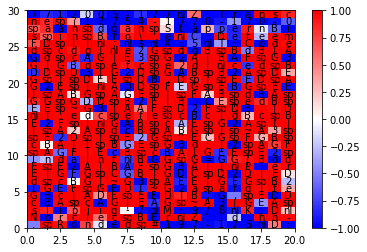

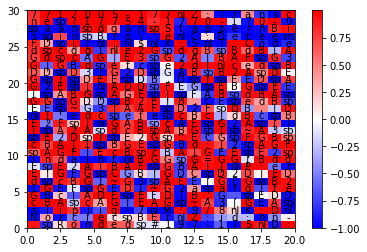

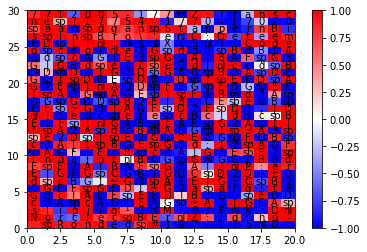

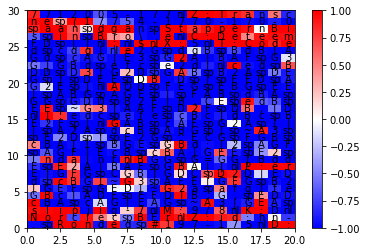

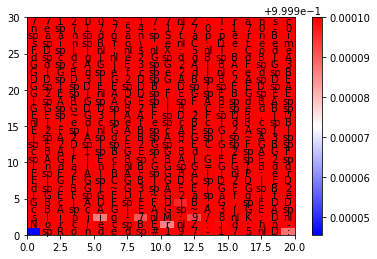

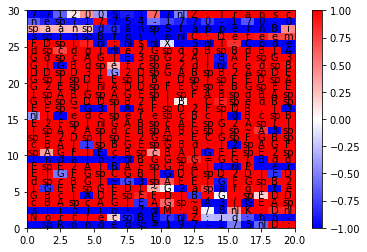

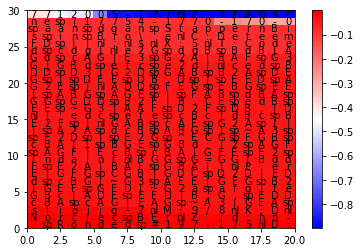

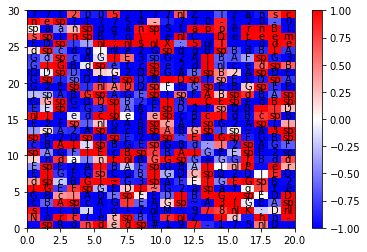

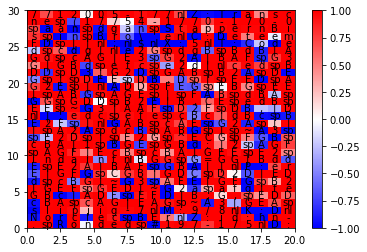

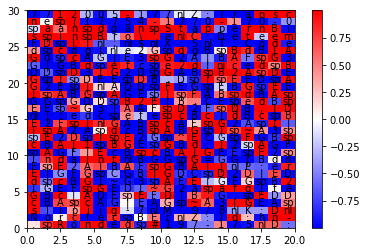

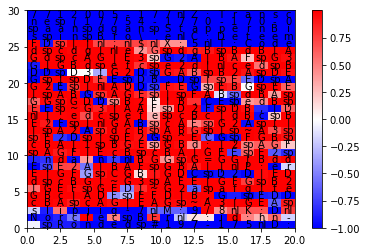

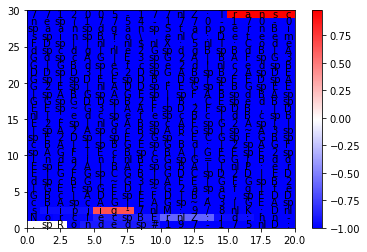

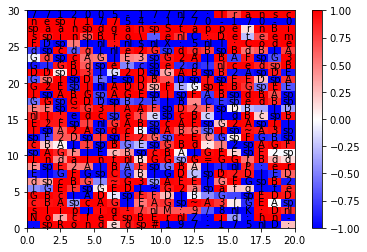

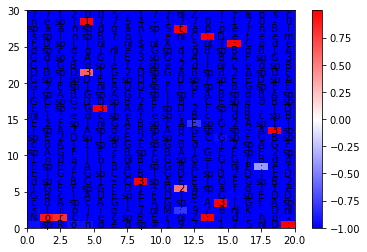

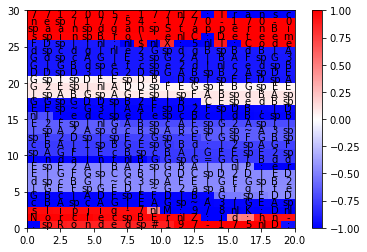

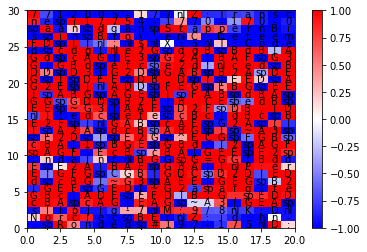

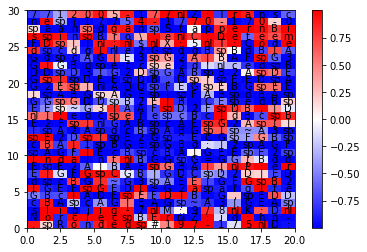

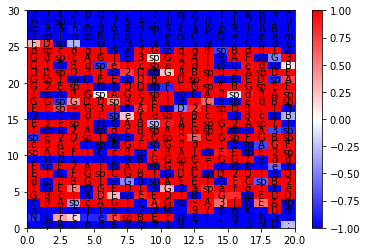

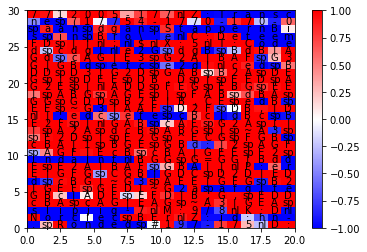

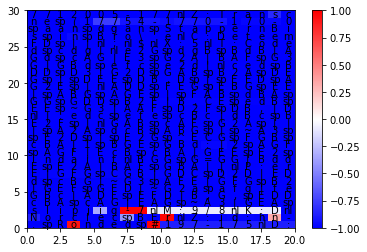

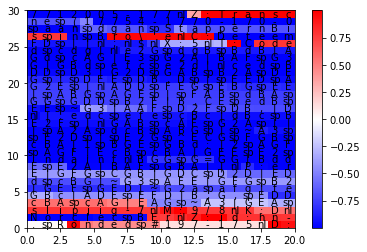

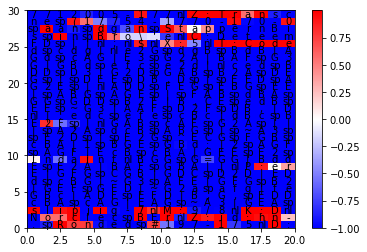

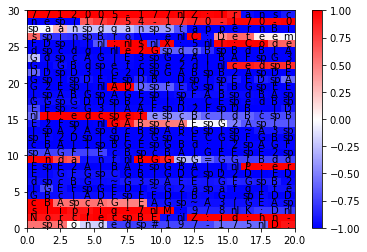

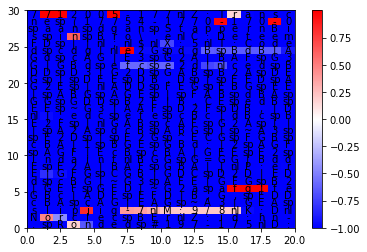

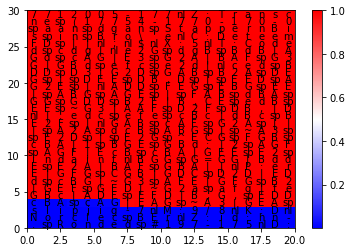

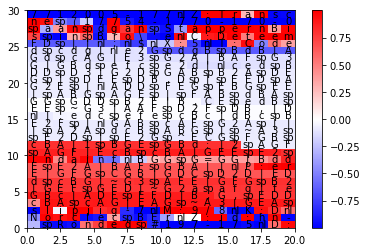

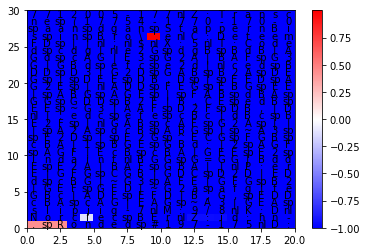

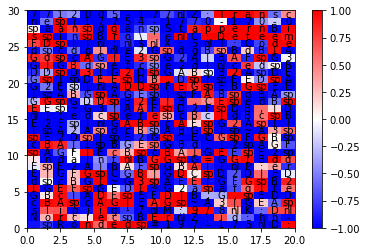

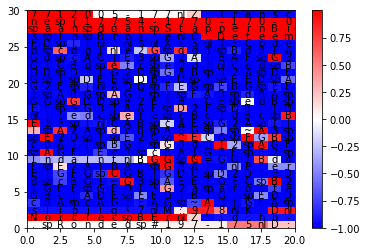

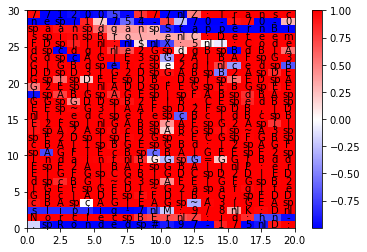

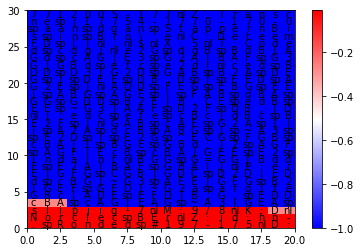

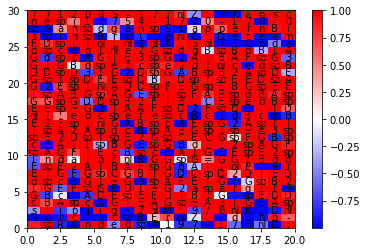

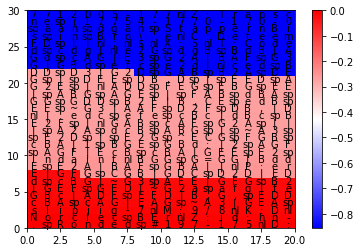

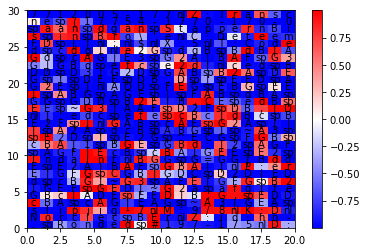

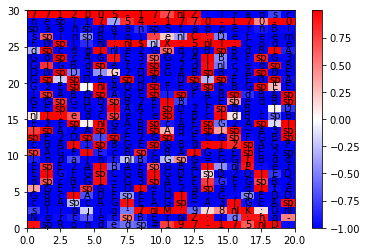

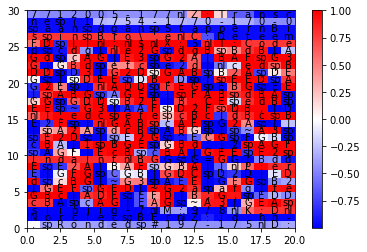

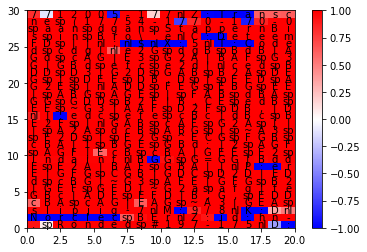

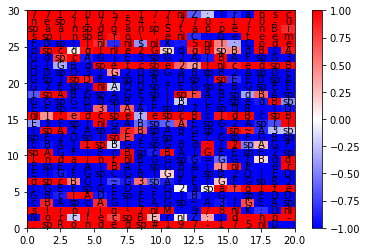

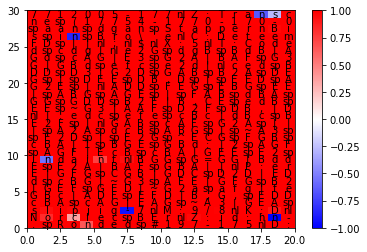

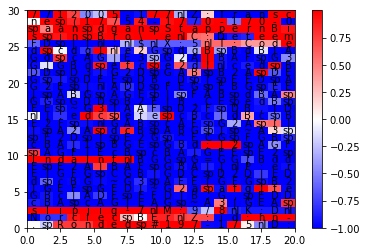

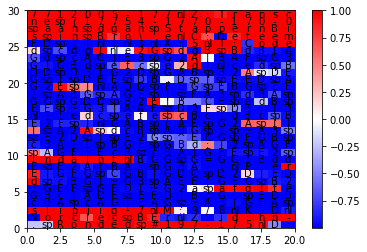

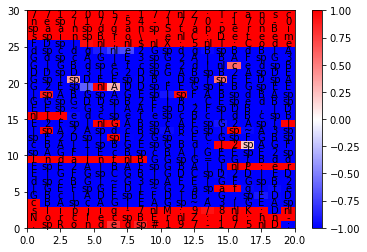

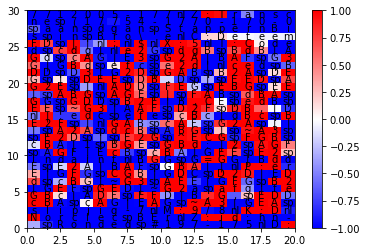

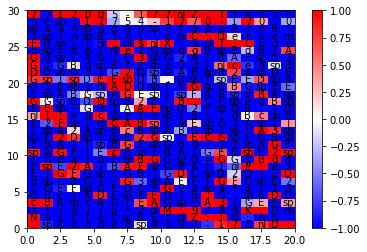

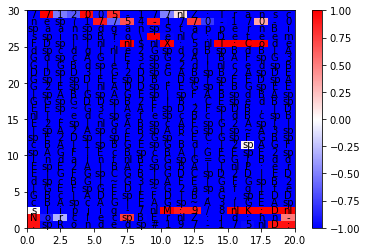

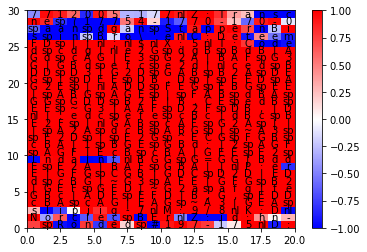

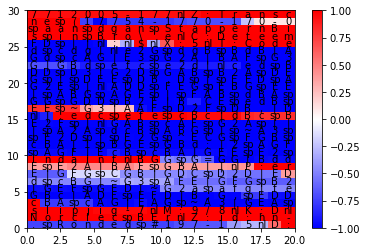

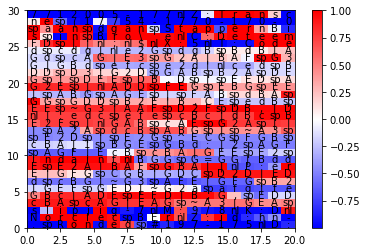

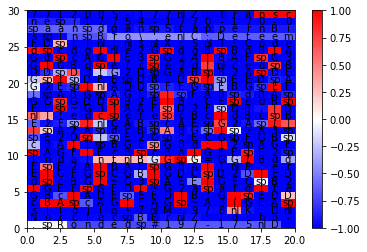

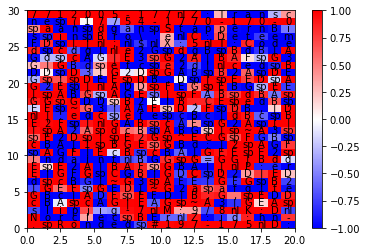

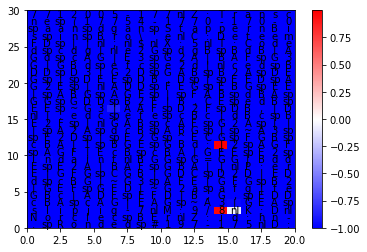

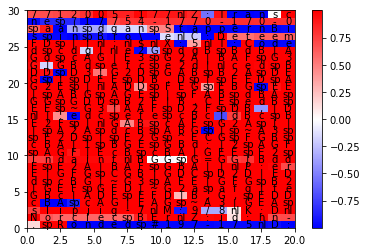

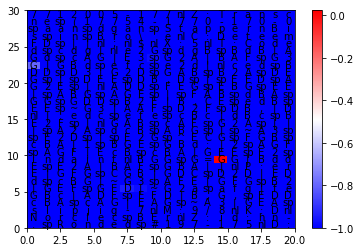

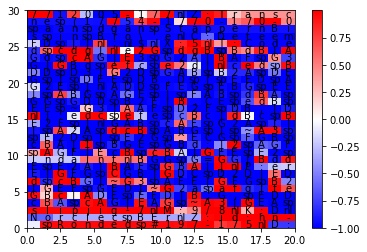

In [6]:
special_chars = {'\n':'nl', ' ':'sp'}

# this relies on prediction_length = 600
for i in hidden_activations.T: 
    data = i.reshape(30,20)

  
    heatmap = plt.pcolor(data,cmap='bwr')

    
    for y in range(data.shape[0]):
        for x in range(data.shape[1]):
            predicted_char = predicted_chars[y*20+x]
            if predicted_char in special_chars: 
                predicted_char = special_chars[predicted_char]

            plt.text(x + 0.5, y + 0.5, predicted_char,
                horizontalalignment='center',
                verticalalignment='center',)
    plt.colorbar(heatmap)

    plt.show()